<a href="https://colab.research.google.com/github/krishbhowmick/ML_AnalyticsVidhya/blob/main/ML7.1_KNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classification

### Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

### Load the data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML_Code/7_KNN/9.  Implementing k-Nearest Neighbours algorithm/data_cleaned.csv') 
data.shape

(891, 25)

In [ ]:
data.head(1)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.25,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)     # x= All the features
y = data['Survived']                    # y= Target variable
x.shape, y.shape

((891, 24), (891,))

### Scaling the data (Using MinMax Scaler)

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x) # Return in array


In [ ]:
# Store array to pandas dataframe ... x_scaled-sacledown value, x.columns-colum like before
x = pd.DataFrame(x_scaled, columns = x.columns)

In [ ]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Importing the train test split function # Split the data into Train & Test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y) 
# random_state = ??? (stratify=y)-ForEqualyDistribution

### Implementing KNN Classifier

In [ ]:
#importing KNN classifier and metric F1 score
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import f1_score 

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10) # Choose the n_neighbors

# Fitting the model 
clf.fit(train_x, train_y)  # Train the model

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)  # Test the data
k = f1_score(test_predict, test_y)  # k value
print('Test F1 Score    ', k ) 

Test F1 Score     0.6956521739130435


### Elbow for Classifier__Decide the right value of K

In [ ]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)  # Train 
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)   # Test
        tmp = f1_score(tmp,test_y)  # F1 score
        error = 1-tmp               # Error
        test_error.append(error)
    
    return test_error

In [ ]:
#Defining K range
k = range(6, 20, 2)

In [ ]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

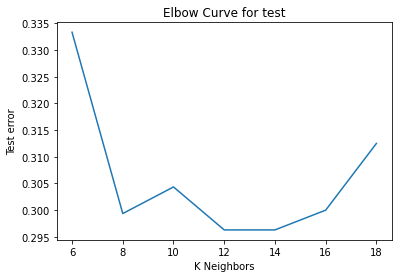

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 11)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7185628742514969


# KNN Regression

### Importing the data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML_Code/7_KNN/9.  Implementing k-Nearest Neighbours algorithm/train_cleaned.csv')
data.shape

(8523, 46)

In [ ]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

### Scaling the data (Using MinMax Scaler)

In [ ]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled)

In [ ]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [ ]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1714854.6015010108


### Elbow for Classifier

In [ ]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [ ]:
#Defining K range
k = range(1,40)

In [ ]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

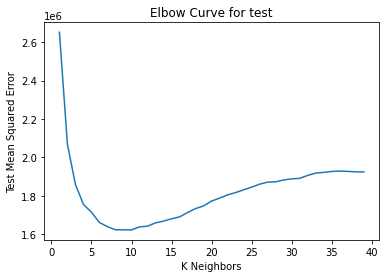

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1622957.615752187
